In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Datei-Pfade (anpassen, falls nötig)
POSTS_CSV = "G:/Meine Ablage/reddit/reddit_posts.csv"
COMMENTS_CSV = "G:/Meine Ablage/reddit/reddit_comments.csv"


In [19]:
# Daten laden
df_posts = pd.read_csv(POSTS_CSV, sep="|", encoding="utf-8-sig", on_bad_lines="skip")
df_comments = pd.read_csv(COMMENTS_CSV, sep="|", encoding="utf-8-sig", on_bad_lines="skip")

In [20]:
df_posts.head()

,crypto,search_term,subreddit,post_id,title,author,score,num_comments,selftext,date,time
0,Ethereum,Ethereum,CryptoCurrency,1idlo4s,Paradigm Says Ethereum’s Future Is at Risk Due...,Next_Statement6145,1,19,NaN,2025-01-30,12:17:04
1,Ethereum,Ethereum,CryptoCurrency,1ic6mf3,World Liberty Financial buys the dip on Ethere...,KIG45,211,51,NaN,2025-01-28,17:15:02
2,Ethereum,Ethereum,CryptoCurrency,1ibs36z,Bullish Signal? Ethereum Sees Highest Surge in...,Afonsoo99,20,4,NaN,2025-01-28,03:09:25
3,Ethereum,Ethereum,CryptoCurrency,1ibrtwo,Ethereum developers pledge cooperation as Ethe...,Every_Hunt_160,64,36,NaN,2025-01-28,02:56:24
4,Ethereum,Ethereum,CryptoCurrency,1ibhnfg,Ethereum Creator Vitalik Buterin Criticizing P...,CriticalCobraz,2180,126,NaN,2025-01-27,19:26:43


In [21]:
df_comments.head()

,post_id,comment_id,author,score,body,date,time,sentiment,sentiment_confidence
0,1ihc9fm,maw4gvb,Equivalent-Fan-1362,1,What’s wrong with ltc? It still has a compelli...,2025-02-04,08:30:17,positive,0.449429
1,1igvb78,mau6p2e,alexanderldn,1,Great news. The person who stole my crypto con...,2025-02-04,00:35:26,positive,0.969849
2,1igvb78,masl6xr,PM_ME_HOUSE_MUSIC_,1,Just converted the last of my ETH for BTC last...,2025-02-03,19:58:13,positive,0.933686
3,1igvb78,mavhzf0,LawSchoolSucks69,1,This was pretty obvious a while ago to people ...,2025-02-04,05:10:22,negative,0.876678
4,1igvb78,matjxrk,ScorchedCSGO,1,[ScorchedCSGO](https://www.reddit.com/user/Sco...,2025-02-03,22:39:07,neutral,0.628734


In [22]:
df_merged = df_posts.merge(df_comments, on="post_id", how="left")
df_merged.dropna(inplace=True)
print(df_merged.isnull().sum())  # Zeigt alle Spalten mit NaN-Werten
print(f"Übrig gebliebene Zeilen nach Cleanup: {len(df_merged)}")

crypto                  0
search_term             0
subreddit               0
post_id                 0
title                   0
author_x                0
score_x                 0
num_comments            0
selftext                0
date_x                  0
time_x                  0
comment_id              0
author_y                0
score_y                 0
body                    0
date_y                  0
time_y                  0
sentiment               0
sentiment_confidence    0
dtype: int64
Übrig gebliebene Zeilen nach Cleanup: 95664


In [23]:
# Anzahl Posts & Kommentare
print(f"📌 Anzahl Posts: {len(df_merged['post_id'].unique())}")
print(f"📌 Anzahl Kommentare: {len(df_merged)}")


📌 Anzahl Posts: 1506
📌 Anzahl Kommentare: 95664


In [24]:
# Am häufigsten diskutierte Kryptowährungen
crypto_counts = df_merged["crypto"].value_counts()
print("Meist diskutierte Kryptowährungen:")
print(crypto_counts.head(10))

Meist diskutierte Kryptowährungen:
crypto
Chainlink        33660
Ethereum         18213
Solana            9997
XRP               7310
Near Protocol     5423
Dogecoin          4624
Athens            3110
Polkadot          2443
Cardano           1802
Stacks            1259
Name: count, dtype: int64


In [25]:
# Meistgenutzte Subreddits
subreddit_counts = df_merged["subreddit"].value_counts()
print("\nMeistgenutzte Subreddits:")
print(subreddit_counts.head(10))


Meistgenutzte Subreddits:
subreddit
CryptoCurrency      62186
CryptoMarkets       27692
DeFi                 2534
Altcoin              1748
BitcoinBeginners     1192
cryptotechnology      209
cryptocurrencies      103
Name: count, dtype: int64


In [26]:
df_post_sentiment = df_merged.groupby("post_id")["sentiment_confidence"].mean().reset_index()
df_post_sentiment = df_post_sentiment.merge(df_merged[["post_id", "title", "crypto"]].drop_duplicates(), on="post_id", how="left")

print("Top 5 positivste Posts:")
print(df_post_sentiment.sort_values("sentiment_confidence", ascending=False).head(5))

print("\nTop 5 negativste Posts:")
print(df_post_sentiment.sort_values("sentiment_confidence", ascending=True).head(5))


Top 5 positivste Posts:
      post_id  sentiment_confidence  \
1443  1iez5nx              0.991032   
447   1h6ryt8              0.989283   
165   1guc6pr              0.987294   
294   1gzviwf              0.986814   
1084  1i1hmuj              0.986463   

                                          title         crypto  
1443                Uniswap V4 New features !!🦄       Ethereum  
447              Coin ranking overtime website             XRP  
165           [FRAUD ALERT] - CYBRO Total Scam          Solana  
294   Thoughts on the KeyStone 3 Pro HW wallet?  Near Protocol  
1084     Long Term Capital Gains Tax and Koinly      Chainlink  

Top 5 negativste Posts:
      post_id  sentiment_confidence  \
1390  1ibxuwb              0.440567   
577   1hbza7u              0.460240   
1455  1ifn12s              0.467842   
1468  1igcce3              0.485405   
260   1gyh4b4              0.490169   

                                                  title     crypto  
1390                  

C:\Users\hp\AppData\Local\Temp\ipykernel_33496\1774074444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm", order=["negative", "neutral", "positive"])


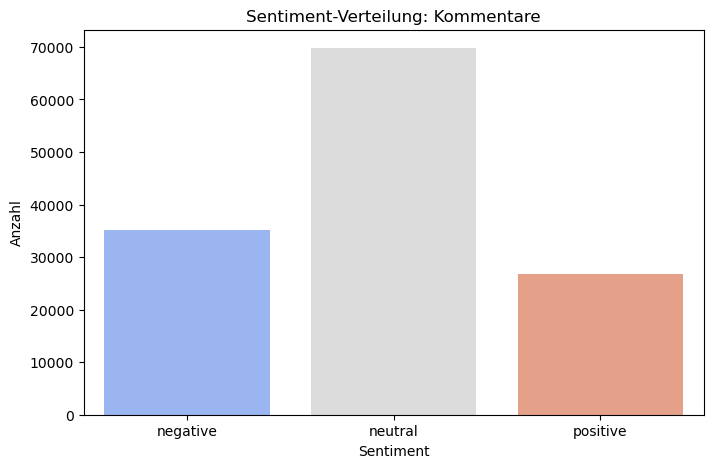

In [27]:
# Sentiment-Verteilung analysieren
def plot_sentiment_distribution(df, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["sentiment"], palette="coolwarm", order=["negative", "neutral", "positive"])
    plt.title(f"Sentiment-Verteilung: {title}")
    plt.xlabel("Sentiment")
    plt.ylabel("Anzahl")
    plt.show()

if "sentiment" in df_comments.columns:
    plot_sentiment_distribution(df_comments, "Kommentare")

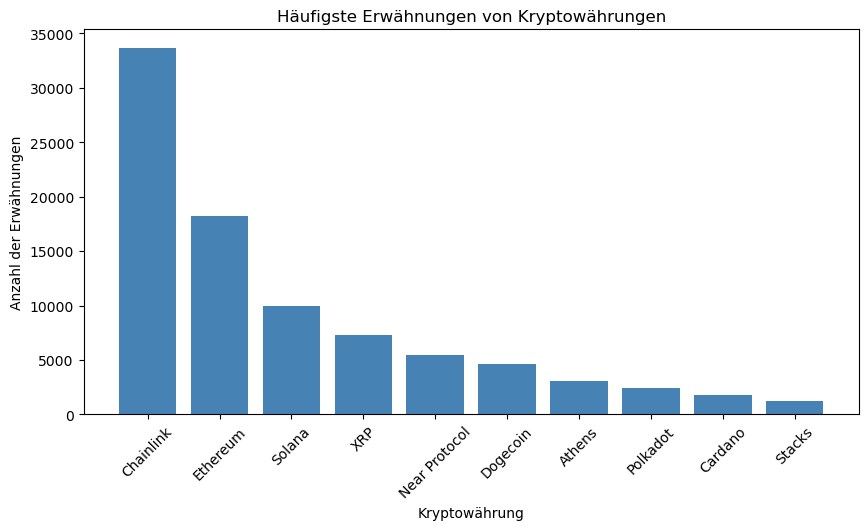

In [28]:
# Welche Coins werden am häufigsten diskutiert?
crypto_counts = df_merged["crypto"].value_counts().head(10)  # Top 10 Kryptowährungen

plt.figure(figsize=(10, 5))
plt.bar(crypto_counts.index, crypto_counts.values, color="steelblue")
plt.xlabel("Kryptowährung")
plt.ylabel("Anzahl der Erwähnungen")
plt.title("Häufigste Erwähnungen von Kryptowährungen")
plt.xticks(rotation=45)
plt.show()

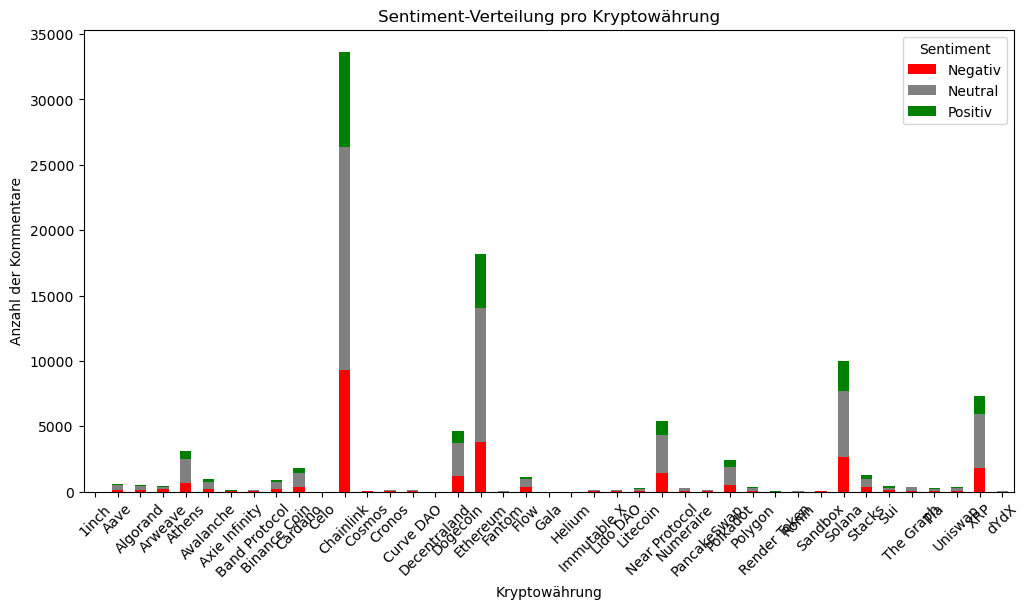

In [29]:
# Allgemeines Sentiment pro Coin (Durchschnitt der positiven/negativen Kommentare)
sentiment_scores = df_merged.groupby("crypto")["sentiment"].value_counts().unstack(fill_value=0)

# Farben definieren (negativ: rot, neutral: grau, positiv: grün)
colors = {"negative": "red", "neutral": "grey", "positive": "green"}

sentiment_scores.plot(kind="bar", stacked=True, figsize=(12, 6), color=[colors[col] for col in sentiment_scores.columns])
plt.xlabel("Kryptowährung")
plt.ylabel("Anzahl der Kommentare")
plt.title("Sentiment-Verteilung pro Kryptowährung")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", labels=["Negativ", "Neutral", "Positiv"])
plt.show()

c:\Users\hp\anaconda3\envs\dennis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


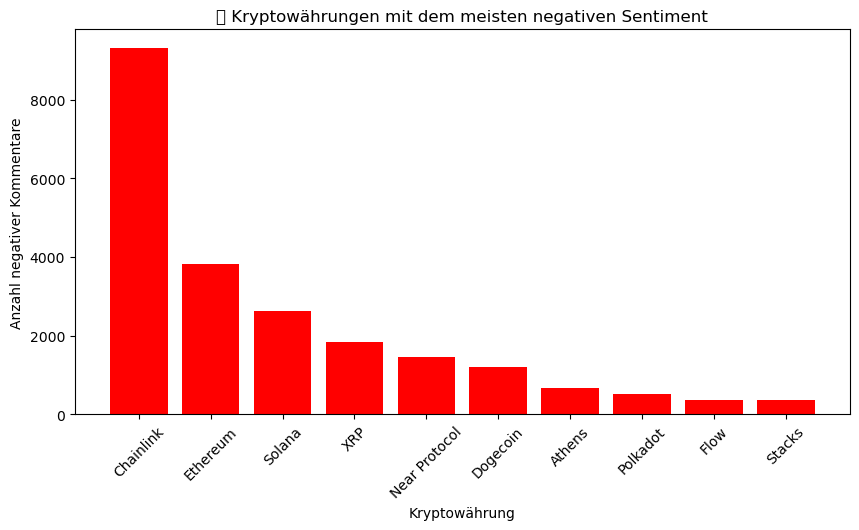

In [30]:
# Gibt es auffällige Muster? (Coins mit besonders viel negativem Sentiment)
neg_sentiment = sentiment_scores["negative"].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(neg_sentiment.index, neg_sentiment.values, color="red")
plt.xlabel("Kryptowährung")
plt.ylabel("Anzahl negativer Kommentare")
plt.title("🚨 Kryptowährungen mit dem meisten negativen Sentiment")
plt.xticks(rotation=45)
plt.show()

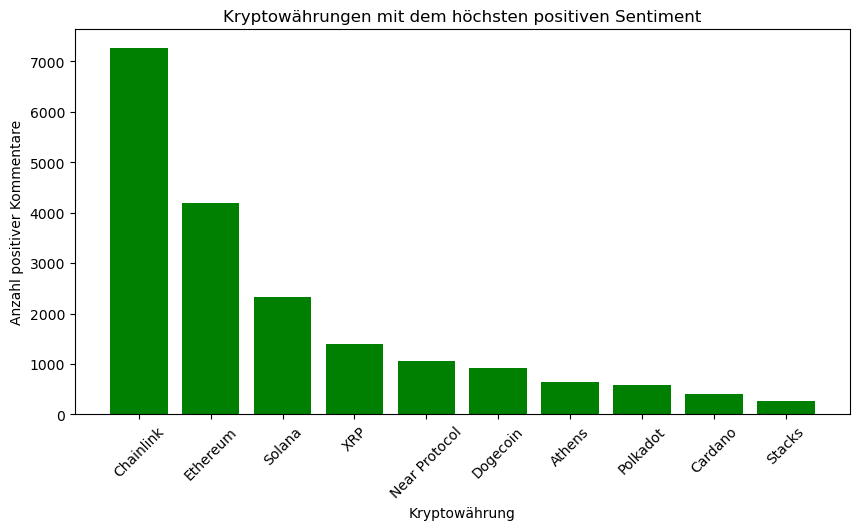

In [31]:
# Kryptowährungen mit dem höchsten positiven Sentiment
pos_sentiment = sentiment_scores["positive"].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(pos_sentiment.index, pos_sentiment.values, color="green")
plt.xlabel("Kryptowährung")
plt.ylabel("Anzahl positiver Kommentare")
plt.title("Kryptowährungen mit dem höchsten positiven Sentiment")
plt.xticks(rotation=45)
plt.show()